In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from scipy.optimize import newton
import scipy.optimize as opt

HESTON MODEL

Parameters

lambda  : mean-reversion speed \
vbar    : long-term average volatility \
eta     : volatility of vol process \
rho     : correlation between stock and vol \
v0      : initial volatility \
r       : risk-free interest rate \
tau     : time to maturity \
S0      : initial share price \
K       : strike price 

In [3]:
def PIntegrand(u, lambda_, vbar, eta, rho, v0, r, tau, S0, K, j):
    F = S0 * np.exp(r * tau)
    x = np.log(F / K)
    a = lambda_ * vbar

    if j == 1:
        b = lambda_ - rho * eta
        alpha = -u**2 / 2 - u / 2 * 1j + 1j * u
        beta = lambda_ - rho * eta - rho * eta * 1j * u
    else:
        b = lambda_
        alpha = -u**2 / 2 - u / 2 * 1j
        beta = lambda_ - rho * eta * 1j * u

    gamma = eta**2 / 2
    d = np.sqrt(beta**2 - 4 * alpha * gamma)
    rplus = (beta + d) / (2 * gamma)
    rminus = (beta - d) / (2 * gamma)
    g = rminus / rplus

    D = rminus * (1 - np.exp(-d * tau)) / (1 - g * np.exp(-d * tau))
    C = lambda_ * (rminus * tau - (2 / (eta**2)) * np.log((1 - g * np.exp(-d * tau)) / (1 - g)))

    top = np.exp(C * vbar + D * v0 + 1j * u * x)
    bottom = 1j * u
    real_part = (top / bottom).real
    return real_part

In [4]:
def P(lambda_, vbar, eta, rho, v0, r, tau, S0, K, j):
        value, _ = quad(PIntegrand, 0, np.inf, args=(lambda_, vbar, eta, rho, v0, r, tau, S0, K, j))
        prob = 0.5 + (1/np.pi) * value
        return prob

In [5]:
def HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0, K):

    A = S0 * P(lambda_, vbar, eta, rho, v0, r, tau, S0, K, 1)
    B = K * np.exp(-r * tau) * P(lambda_, vbar, eta, rho, v0, r, tau, S0, K, 0)
    
    return A - B

In [6]:
print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

103.45516345802363


In [9]:
#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt

# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 201)
v0_range = np.linspace(0, 1, 101)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

# Initialize the HestonPrice matrix
HestonPrice = np.zeros((len(v0_range), len(S0_range)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range)):
    for j in range(len(S0_range)):
        if S0_range[j] == 0:
            HestonPrice[i][j] = 0
        else:
            HestonPrice[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)




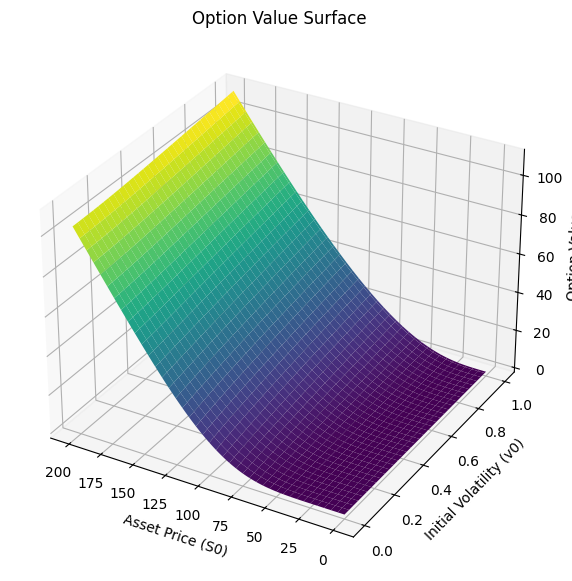

In [10]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S0, v0, HestonPrice, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S0)')
ax.set_ylabel('Initial Volatility (v0)')
ax.set_zlabel('Option Value')

# Title
ax.set_title('Option Value Surface')

# Show the plot
plt.show()

NameError: name 'np' is not defined